In [2]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import linear_model, preprocessing, neighbors, grid_search, cross_validation

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'abalone.csv'))

In [4]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
df.corr()

,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
WholeWeight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
ShuckedWeight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
VisceraWeight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
ShellWeight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


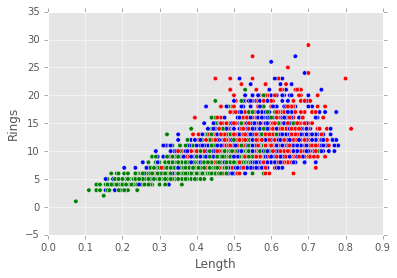

In [6]:
color = df.Sex.map({'F': 'red', 'I': 'green', 'M': 'blue'})
df.plot(x = 'Length', y = 'Rings', kind = 'scatter', c = color)

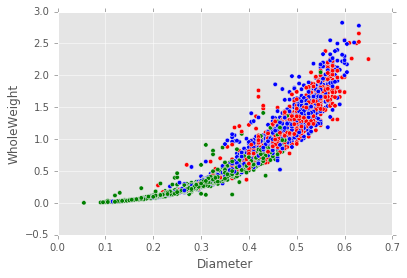

In [7]:
df.plot(x = 'Diameter', y = 'WholeWeight', kind = 'scatter', c = color)

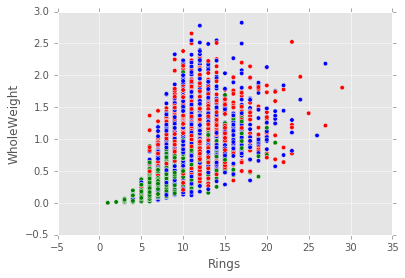

In [8]:
df.plot(x = 'Rings', y = 'WholeWeight', kind = 'scatter', c = color)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a44e8d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b6d6190>]], dtype=object)

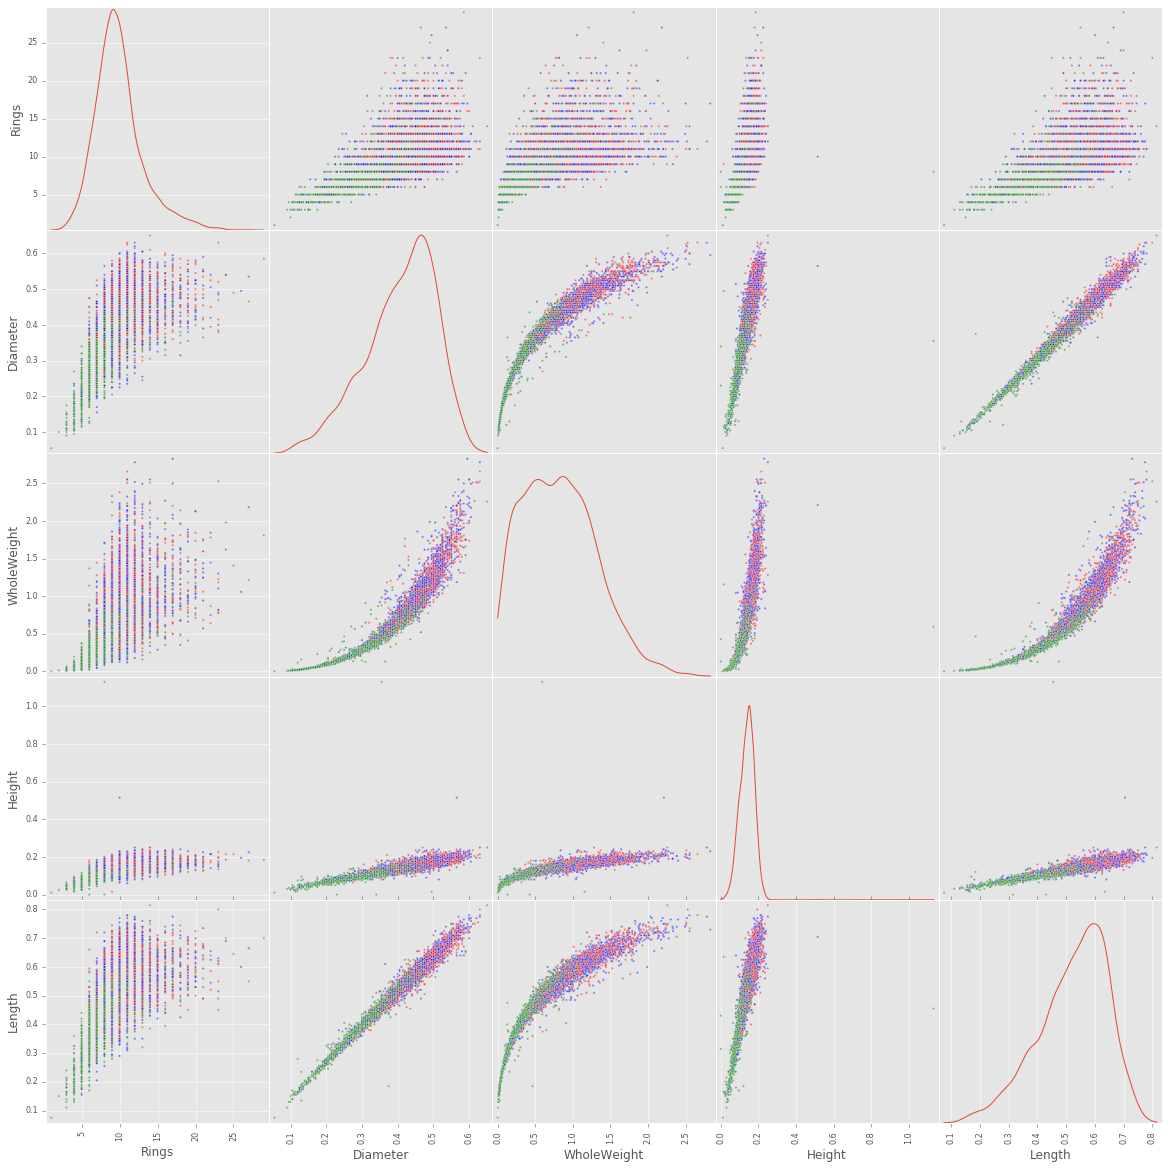

In [20]:
pd.tools.plotting.scatter_matrix(df[ ['Rings', 'Diameter', 'WholeWeight', 'Height', 'Length'] ], diagonal = 'kde', figsize = (20, 20), c = color)

In [22]:
df[ ['WholeWeight', 'ShuckedWeight', 'VisceraWeight', 'ShellWeight']]

,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight
0,0.5140,0.2245,0.1010,0.1500
1,0.2255,0.0995,0.0485,0.0700
2,0.6770,0.2565,0.1415,0.2100
3,0.5160,0.2155,0.1140,0.1550
4,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...
4172,0.8870,0.3700,0.2390,0.2490
4173,0.9660,0.4390,0.2145,0.2605
4174,1.1760,0.5255,0.2875,0.3080
4175,1.0945,0.5310,0.2610,0.2960


In [30]:
df[(df.WholeWeight < (df.ShuckedWeight + df.VisceraWeight + df.ShellWeight))]

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
42,I,0.240,0.175,0.045,0.0700,0.0315,0.0235,0.0200,5
43,I,0.205,0.150,0.055,0.0420,0.0255,0.0150,0.0120,5
44,I,0.210,0.150,0.050,0.0420,0.0175,0.0125,0.0150,4
45,I,0.390,0.295,0.095,0.2030,0.0875,0.0450,0.0750,7
46,M,0.470,0.370,0.120,0.5795,0.2930,0.2270,0.1400,9
...,...,...,...,...,...,...,...,...,...
3963,I,0.270,0.205,0.075,0.1180,0.0590,0.0310,0.0305,4
3969,I,0.380,0.300,0.090,0.2770,0.1655,0.0625,0.0820,6
3996,I,0.315,0.230,0.000,0.1340,0.0575,0.0285,0.3505,6
4046,M,0.600,0.460,0.155,0.6655,0.2850,0.1490,0.2690,11


In [7]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()
train_df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.3300,20
...,...,...,...,...,...,...,...,...,...
4169,M,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,10
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [8]:
test_df = df.drop(train_df.index)
test_df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.2600,16
12,M,0.490,0.380,0.135,0.5415,0.2175,0.0950,0.1900,11
16,I,0.355,0.280,0.085,0.2905,0.0950,0.0395,0.1150,7
...,...,...,...,...,...,...,...,...,...
4165,I,0.405,0.300,0.085,0.3035,0.1500,0.0505,0.0880,7
4166,I,0.475,0.365,0.115,0.4990,0.2320,0.0885,0.1560,10
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [18]:
train_X = train_df[ ['Diameter', 'WholeWeight', 'Height', 'Rings'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

train_c = train_df.Sex

model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights = 'uniform').\
    fit(train_X, train_c)

model.score(train_X, train_c)

0.67597765363128492

In [19]:
k = range(1, 100)

score_df = pd.DataFrame({'k': k})

score_df['model'] = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_c), axis = 1)

score_df['score'] = score_df.model.apply(lambda model: model.score(train_X, train_c))
score_df

,k,model,score
0,1,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.999601
1,2,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.750599
2,3,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.739824
3,4,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.685954
4,5,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.675978
...,...,...,...
94,95,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.575818
95,96,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.578212
96,97,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.579409
97,98,"KNeighborsClassifier(algorithm='auto', leaf_si...",0.581006


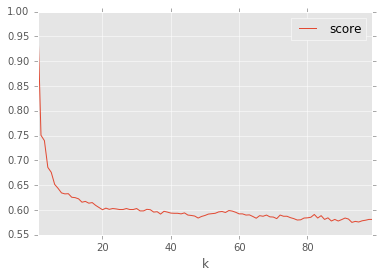

In [20]:
score_df.plot(x = 'k', y = 'score')


In [28]:
test_X = test_df[ ['Diameter', 'WholeWeight', 'Height', 'Rings'] ]

scaler = preprocessing.MinMaxScaler().fit(test_X)

test_X = scaler.transform(test_X)

test_c = test_df.Sex

model = neighbors.KNeighborsClassifier(n_neighbors = 1, weights = 'uniform').\
    fit(test_X, test_c)

model.score(test_X, test_c)

1.0

In [29]:
k = range(1, 100)

score_df = pd.DataFrame({'k': k})

models = score_df.\
    apply(lambda row: neighbors.KNeighborsClassifier(n_neighbors = row['k']).fit(train_X, train_c), axis = 1)

score_df['train_score'] = models.apply(lambda model: model.score(train_X, train_c))
score_df['test_score'] = models.apply(lambda model: model.score(test_X, test_c))

In [30]:
score_df

,k,train_score,test_score
0,1,0.999601,0.476361
1,2,0.750599,0.497307
2,3,0.739824,0.479354
3,4,0.685954,0.488330
4,5,0.675978,0.493118
...,...,...,...
94,95,0.575818,0.517056
95,96,0.578212,0.522442
96,97,0.579409,0.522442
97,98,0.581006,0.520646


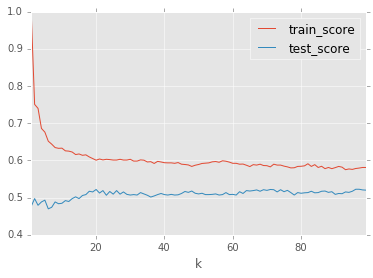

In [27]:
score_df.set_index('k').plot()

In [31]:
df

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [52]:
volume = (3.14 * df.Length / 2 * df.Height / 2 * df.Diameter)
df['Volume'] = volume
density = (df.WholeWeight / volume)
df['Density'] = density
df.drop(df[df.Volume == 0].index, inplace = True)
df.shape


(4175, 11)

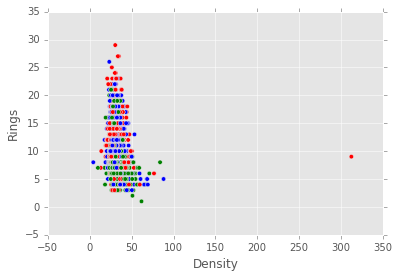

In [51]:
df.plot(x = 'Density', y = 'Rings', kind = 'scatter', c = color)

In [53]:
train_df = df.sample(frac = .6, random_state = 0).sort_index()
train_df

,Sex,Length,Diameter,Height,WholeWeight,...,VisceraWeight,ShellWeight,Rings,Density,Volume
1,M,0.350,0.265,0.090,0.2255,...,0.0485,0.0700,7,34.412836,0.006553
2,F,0.530,0.420,0.135,0.6770,...,0.1415,0.2100,9,28.698559,0.023590
4,I,0.330,0.255,0.080,0.2050,...,0.0395,0.0550,7,38.791815,0.005285
5,I,0.425,0.300,0.095,0.3515,...,0.0775,0.1200,8,36.967653,0.009508
6,F,0.530,0.415,0.150,0.7775,...,0.1415,0.3300,20,30.020334,0.025899
...,...,...,...,...,...,...,...,...,...,...,...
4168,F,0.515,0.400,0.125,0.6150,...,0.1230,0.1765,8,30.424835,0.020214
4169,M,0.520,0.385,0.165,0.7910,...,0.1800,0.1815,10,30.504142,0.025931
4170,M,0.550,0.430,0.130,0.8395,...,0.1955,0.2405,10,34.783762,0.024135
4171,M,0.560,0.430,0.155,0.8675,...,0.1720,0.2290,8,29.608175,0.029299


In [54]:
test_df = df.drop(train_df.index)
test_df

,Sex,Length,Diameter,Height,WholeWeight,...,VisceraWeight,ShellWeight,Rings,Density,Volume
0,M,0.455,0.365,0.095,0.5140,...,0.1010,0.1500,15,41.501672,0.012385
3,M,0.440,0.365,0.125,0.5160,...,0.1140,0.1550,10,32.743454,0.015759
7,F,0.545,0.425,0.125,0.7680,...,0.1495,0.2600,16,33.790617,0.022728
12,M,0.490,0.380,0.135,0.5415,...,0.0950,0.1900,11,27.441975,0.019733
16,I,0.355,0.280,0.085,0.2905,...,0.0395,0.1150,7,43.799703,0.006632
...,...,...,...,...,...,...,...,...,...,...,...
4166,I,0.475,0.365,0.115,0.4990,...,0.0885,0.1560,10,31.882075,0.015651
4173,M,0.590,0.440,0.135,0.9660,...,0.2145,0.2605,10,35.113087,0.027511
4174,M,0.600,0.475,0.205,1.1760,...,0.2875,0.3080,9,25.641235,0.045864
4175,F,0.625,0.485,0.150,1.0945,...,0.2610,0.2960,10,30.664303,0.035693


In [59]:
train_X = train_df[ ['Density', 'Volume', 'Rings'] ]

scaler = preprocessing.MinMaxScaler().fit(train_X)

train_X = scaler.transform(train_X)

train_c = train_df.Sex

model = neighbors.KNeighborsClassifier(n_neighbors = 4, weights = 'uniform').\
    fit(train_X, train_c)

model.score(train_X, train_c)

0.68343313373253489